# Chapter 1: Exploratory Data Analysis - Practice Notebook

**Book:** Practical Statistics for Data Scientists  
**Focus:** Hands-on practice with biology-friendly datasets

---

## Instructions
- Each section has a **concept review** followed by **coding exercises**
- Write your code in the empty cells
- Conceptual questions ask you to explain in your own words (use markdown)
- Datasets used: `penguins`, `iris`, and a synthetic biology dataset

---

## Setup: Load Libraries and Data

Run this cell to set up your environment.

In [1]:
# Run this cell first - imports and data loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import trim_mean
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('colorblind')

# Load the penguins dataset
penguins = sns.load_dataset('penguins').dropna()

# Load the iris dataset
iris = sns.load_dataset('iris')

# Create a synthetic gene expression dataset
np.random.seed(42)
n_samples = 200
gene_expression = pd.DataFrame({
    'sample_id': [f'S{i:03d}' for i in range(1, n_samples + 1)],
    'condition': np.random.choice(['control', 'treatment_A', 'treatment_B'], n_samples),
    'gene_BRCA1': np.random.lognormal(mean=3, sigma=0.5, size=n_samples),
    'gene_TP53': np.random.lognormal(mean=4, sigma=0.8, size=n_samples),
    'gene_MYC': np.random.lognormal(mean=2.5, sigma=1.2, size=n_samples),
    'cell_count': np.random.poisson(lam=1000, size=n_samples),
    'viability_pct': np.clip(np.random.normal(85, 10, n_samples), 0, 100),
    'tumor_stage': np.random.choice(['I', 'II', 'III', 'IV'], n_samples, p=[0.4, 0.3, 0.2, 0.1])
})

# Add some outliers to make it realistic
gene_expression.loc[5, 'gene_MYC'] = 500  # outlier
gene_expression.loc[10, 'gene_TP53'] = 800  # outlier

print("Datasets loaded successfully!")
print(f"\nPenguins: {penguins.shape[0]} rows, {penguins.shape[1]} columns")
print(f"Iris: {iris.shape[0]} rows, {iris.shape[1]} columns")
print(f"Gene Expression: {gene_expression.shape[0]} rows, {gene_expression.shape[1]} columns")

Datasets loaded successfully!

Penguins: 333 rows, 7 columns
Iris: 150 rows, 5 columns
Gene Expression: 200 rows, 8 columns


In [2]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
gene_expression.head()

,sample_id,condition,gene_BRCA1,gene_TP53,gene_MYC,cell_count,viability_pct,tumor_stage
0,S001,treatment_B,14.420212,198.077080,16.641603,1067,89.822719,II
1,S002,control,18.667118,83.293319,2.587667,991,80.801003,I
2,S003,treatment_B,13.157494,40.682164,1.872722,948,96.312528,II
3,S004,treatment_B,13.313191,35.227295,15.611805,1023,82.252525,I
4,S005,control,34.583044,125.831098,8.006546,957,98.844421,I


---

# PART 1: Elements of Structured Data

---

## Conceptual Question 1

**In your own words, explain the difference between:**
- Continuous vs. Discrete numeric data
- Categorical vs. Ordinal data

Give one example of each from biology.

*Your answer here:*

**Continuous vs Discrete:**  
Continuous data is data that has no end and can span millions of numbers after the decimal, element of R. Discrete data has an end like the number 3, element of Z.

**Categorical vs Ordinal:**  
Categorical data is data that can't be ranked like the names of children in a classroom, whereas ordinal data, like in the name can be ranked and "orderd" like heights of children in a classroom ordered from shortest to tallest.

## Exercise 1.1: Identify Data Types

Look at the `gene_expression` dataset and classify each column as:
- Continuous
- Discrete
- Categorical (nominal)
- Ordinal
- Binary

In [8]:
# TODO: Display the first few rows of gene_expression to examine the data
gene_expression.head(n=10)

,sample_id,condition,gene_BRCA1,gene_TP53,gene_MYC,cell_count,viability_pct,tumor_stage
0,S001,treatment_B,14.420212,198.077080,16.641603,1067,89.822719,II
1,S002,control,18.667118,83.293319,2.587667,991,80.801003,I
2,S003,treatment_B,13.157494,40.682164,1.872722,948,96.312528,II
3,S004,treatment_B,13.313191,35.227295,15.611805,1023,82.252525,I
4,S005,control,34.583044,125.831098,8.006546,957,98.844421,I
5,S006,control,33.198126,65.574233,500.000000,1013,92.574557,I
6,S007,treatment_B,16.104794,16.002547,61.051550,1051,85.285968,II
7,S008,treatment_A,19.257825,72.999726,2.536567,985,100.000000,II
8,S009,treatment_B,37.281903,136.387108,267.197996,987,94.522935,II
9,S010,treatment_B,9.843000,108.450270,5.761397,1034,100.000000,II


In [6]:
# TODO: Check the data types that pandas assigned to each column
gene_expression.dtypes

sample_id         object
condition         object
gene_BRCA1       float64
gene_TP53        float64
gene_MYC         float64
cell_count         int64
viability_pct    float64
tumor_stage       object
dtype: object

*Classify each column (write your answers here):*

- sample_id: Ordinal
- condition: Categorical
- gene_BRCA1: Continuous
- gene_TP53: Continuous
- gene_MYC: Continuous
- cell_count: Discrete
- viability_pct: Continuous
- tumor_stage: Ordinal

## Exercise 1.2: Convert Ordinal Data

The `tumor_stage` column is ordinal (I < II < III < IV), but pandas treats it as a regular category. Convert it to an ordered categorical type.

In [26]:
# TODO: Convert tumor_stage to an ordered categorical with the correct order (I < II < III < IV)
# Hint: Use pd.Categorical() with the ordered=True parameter
gene_expression['tumor_stage'] = pd.Categorical(
    gene_expression['tumor_stage'], 
    categories=['I', 'II', 'III', 'IV'], 
    ordered=True    
)

In [10]:
gene_expression['tumor_stage'].dtype

CategoricalDtype(categories=['I', 'II', 'III', 'IV'], ordered=True, categories_dtype=object)

In [31]:
# TODO: Verify it worked by checking if stage 'II' > stage 'I' returns True
# Create two categorical values and compare them directly
pd.Categorical(["II"], categories=["I", "II", "III", "IV"], ordered=True)[0] > \
pd.Categorical(["I"], categories=["I", "II", "III", "IV"], ordered=True)[0]

True

---

# PART 2: Rectangular Data

---

## Conceptual Question 2

**What is the difference between a "feature" and an "outcome" (target) variable?**

In the gene_expression dataset, if we wanted to predict tumor_stage, which columns would be features and which would be the outcome?

*Your answer here:*  
Features are columns of the dataset used to predict another column-the outcome (target) variable.
For the `gene_expression` dataset, I would use the `gene_BRCA1, gene_TP53, gene_MYC, cell_count` and `viability_pct` to predict `tumor_stage`.

**Definition:**  
The difference between features and target variable is that features are the input variables used to predict or explain the target variable, which is the outcome or dependent variable we are interested in forecasting or understanding.

## Exercise 2.1: Exploring DataFrame Structure

In [ ]:
# TODO: How many rows (records/observations) are in the penguins dataset?
penguins.shape[0]

# also
len(penguins)

# The difference between len() and shape[0] is that len() is a built-in Python function that returns the number of items in an 
# object, while shape[0] is an attribute of a pandas DataFrame that specifically returns the number of rows in that DataFrame.

# For data analysis, both can be used to get the number of rows, but shape[0] is more explicit when working with pandas DataFrames.

333

In [ ]:
# TODO: How many columns (features/variables) are in the penguins dataset?
penguins.shape[1]

# shape[0] gives number of rows, shape[1] gives number of columns

7

In [35]:
# TODO: List all the column names in the penguins dataset
penguins.columns.tolist()

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

---

# PART 3: Estimates of Location

---

## Conceptual Question 3

**Why might the median be preferred over the mean when analyzing gene expression data?**

*Your answer here:*



## Exercise 3.1: Calculate Mean

In [36]:
# TODO: Calculate the mean bill_length_mm for penguins
penguins['bill_length_mm'].mean()

np.float64(43.99279279279279)

In [37]:
# TODO: Calculate the mean of gene_BRCA1 expression
gene_expression['gene_BRCA1'].mean()

np.float64(23.00374175997305)

## Exercise 3.2: Calculate Median

In [38]:
# TODO: Calculate the median bill_length_mm for penguins
penguins["bill_length_mm"].median()

np.float64(44.5)

In [ ]:
# TODO: Calculate the median of gene_MYC expression
# TODO: Now calculate the mean of gene_MYC expression
# Note: gene_MYC has an outlier - compare the mean and median

print(f"The mean is { gene_expression['gene_MYC'].mean() } and the median is { gene_expression['gene_MYC'].median()}")
print("The median is less affected by the outlier compared to the mean.")

The mean is 36.165115143128354 and the median is 14.660300798662533
The median is less affected by the outlier compared to the mean.


In [ ]:
# How does it compare to the median? What does this tell you about the distribution?
# This tells us that the distribution of gene_MYC expression is right-skewed due to the presence of the outlier,
# which pulls the mean higher than the median.

## Exercise 3.3: Trimmed Mean

A trimmed mean drops extreme values before calculating the mean. This makes it more robust to outliers.

In [ ]:
# TODO: Calculate the 10% trimmed mean of gene_MYC
# Use: trim_mean(data, proportiontocut=0.1)
# Compare this to the regular mean and median
print(f"The 10% trimmed mean of gene_MYC is { trim_mean(gene_expression['gene_MYC'], proportiontocut=0.1) }")
print(f"The regular mean is { gene_expression['gene_MYC'].mean() } and the median is { gene_expression['gene_MYC'].median() }")

# The 10% trimmed mean is closer to the median than to the regular mean, indicating that trimming the extreme values
# reduces the influence of the outlier and provides a measure of central tendency that is more robust to outliers.

The 10% trimmed mean of gene_MYC is 20.401330465528687
The regular mean is 36.165115143128354 and the median is 14.660300798662533


## Exercise 3.4: Weighted Mean

Suppose you want to calculate the average gene expression weighted by cell count (more cells = more weight).

In [45]:
# TODO: Calculate the weighted mean of gene_BRCA1, weighted by cell_count
# Use: np.average(values, weights=weights)
print(f"The weighted mean of gene_BRCA1, weighted by cellcount is {np.average(gene_expression['gene_BRCA1'], weights=gene_expression['cell_count'])}")

The weighted mean of gene_BRCA1, weighted by cellcount is 22.97465424474886


In [ ]:
# TODO: Compare the weighted mean to the unweighted mean of gene_BRCA1
print(f"The unweighted mean of gene_BRCA1 is {gene_expression['gene_BRCA1'].mean()}")

The unweighted mean of gene_BRCA1 is 23.00374175997305


## Conceptual Question 4

**When would you use a weighted mean in biological research? Give a specific example.**

*Your answer here:*  
The weighted mean takes into account the cell_count, giving more importance to samples with higher cell counts.
This can provide a more accurate representation of the average gene_BRCA1 expression in the context of varying cell populations.

---

# PART 4: Estimates of Variability

---

## Conceptual Question 5

**Why is variance calculated using squared deviations rather than just averaging the deviations from the mean?**

*Your answer here:*  
Squaring the deviations ensures that positive and negative differences do not cancel each other out.

## Exercise 4.1: Standard Deviation

In [47]:
# TODO: Calculate the standard deviation of flipper_length_mm in penguins
penguins['flipper_length_mm'].std()

np.float64(14.015765288287879)

In [ ]:
# TODO: Calculate the variance of flipper_length_mm in penguins
# Verify that variance = std^2
print(f"The variance of flipper_length_mm is {penguins['flipper_length_mm'].var()}")
print(f"The square of the standard deviation is {penguins['flipper_length_mm'].std() ** 2}")

The variance of flipper_length_mm is 196.44167661637542
The square of the standard deviation is 196.44167661637542


## Exercise 4.2: Interquartile Range (IQR)

In [50]:
# TODO: Calculate the 25th and 75th percentiles (Q1 and Q3) of body_mass_g in penguins
penguins['body_mass_g'].quantile([0.25, 0.75])

0.25    3550.0
0.75    4775.0
Name: body_mass_g, dtype: float64

In [51]:
# TODO: Calculate the IQR (Q3 - Q1) of body_mass_g
penguins['body_mass_g'].quantile(0.75) - penguins['body_mass_g'].quantile(0.25)

np.float64(1225.0)

## Exercise 4.3: Median Absolute Deviation (MAD)

MAD is a robust measure of variability.

In [ ]:
# TODO: Calculate the MAD for gene_MYC expression
# Use: stats.median_abs_deviation(data)
# Compare to standard deviation - which is larger? Why?
gene_MYC_mad = stats.median_abs_deviation(gene_expression['gene_MYC'])
gene_MYC_std = gene_expression['gene_MYC'].std()

print(f"The MAD of gene_MYC is {gene_MYC_mad}")
print(f"The standard deviation of gene_MYC is {gene_MYC_std}")

# The standard deviation is larger than the MAD because the standard deviation is more sensitive to extreme values (outliers).
# The presence of an outlier in gene_MYC expression increases the standard deviation significantly, while the MAD, 
# being based on median deviations, is less affected by outliers.

The MAD of gene_MYC is 11.063348395321931
The standard deviation of gene_MYC is 68.88227307854443


## Exercise 4.4: Percentiles

In [54]:
# TODO: Calculate the 5th, 25th, 50th, 75th, and 95th percentiles of viability_pct
gene_expression["viability_pct"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05     66.469974
0.25     78.533081
0.50     86.034788
0.75     92.605062
0.95    100.000000
Name: viability_pct, dtype: float64

---

# PART 5: Exploring the Data Distribution

---

## Exercise 5.1: Histograms

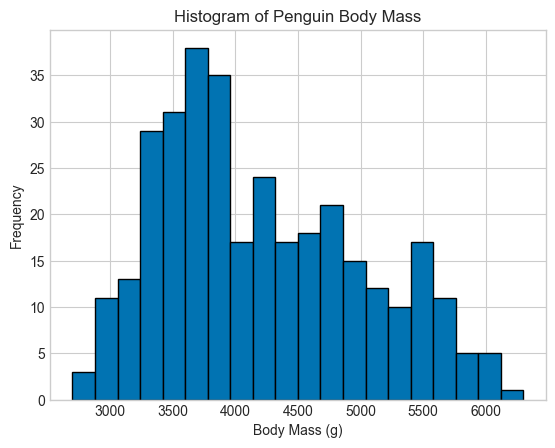

In [55]:
# TODO: Create a histogram of penguin body_mass_g
# Use 20 bins
penguins['body_mass_g'].plot.hist(bins=20, edgecolor='black')
plt.xlabel('Body Mass (g)')
plt.title('Histogram of Penguin Body Mass')
plt.show()

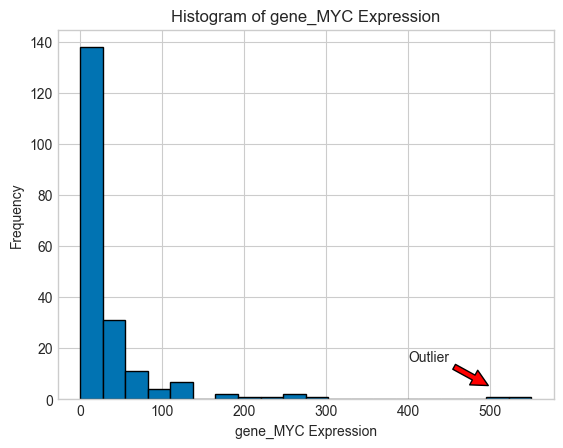

In [77]:
# TODO: Create a histogram of gene_MYC expression
# Notice how the outlier affects the visualization
gene_expression['gene_MYC'].plot.hist(bins=20, edgecolor='black')
plt.xlabel('gene_MYC Expression')
plt.title('Histogram of gene_MYC Expression')
# To add an arrow to highlight the outlier
plt.annotate('Outlier', xy=(500, 5), xytext=(400, 15),
            # the addition of shrink parameter in arrowprops makes the arrow tail smaller and facecolor makes the arrow red.
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Other options other than arrowprops include:
# arrowstyle: Defines the style of the arrow (e.g., '->', '-|>', 'fancy', 'simple').
# color: Sets the color of the arrow.
# linewidth: Specifies the width of the arrow line.

## Exercise 5.2: Boxplots

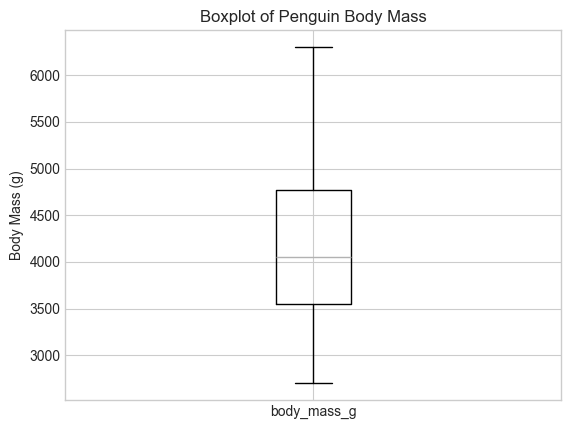

In [ ]:
# TODO: Create a boxplot of body_mass_g for penguins
penguins.boxplot(column='body_mass_g')
plt.ylabel('Body Mass (g)')
plt.title('Boxplot of Penguin Body Mass')
plt.show()

# other options for boxplot include:
# by: Specifies a column name to group the data by before plotting.
# grid: If True, adds a grid to the plot (default is True).
# vert: If True, creates a vertical boxplot; if False, creates a horizontal boxplot (default is True).

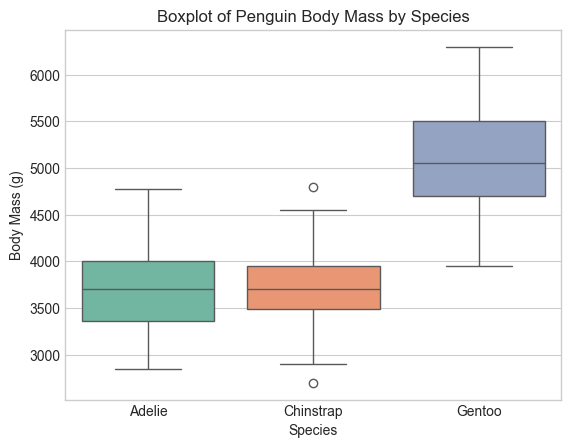

In [ ]:
# TODO: Create boxplots of body_mass_g grouped by species
# Hint: Use seaborn's boxplot with x and y parameters
sns.boxplot(x='species', y='body_mass_g', data=penguins, palette='Set2')
plt.ylabel('Body Mass (g)')
plt.xlabel('Species')
plt.title('Boxplot of Penguin Body Mass by Species')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by species' title
plt.show()

# Other options for seaborn boxplot include:
# hue: Adds a third categorical variable to further split the data within each x category.
# palette: Specifies the color palette to use for the boxplots.
# notch: If True, creates notched boxplots to visualize the confidence interval around the median

# You can add palette to change colors, e.g., palette='Set2' in the boxplot function 
# but you must change the import statement to include seaborn as sns.

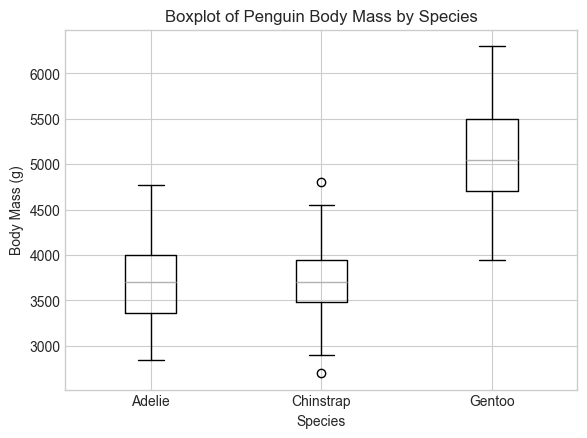

In [91]:
penguins.boxplot(column='body_mass_g', by='species')
plt.ylabel('Body Mass (g)') 
plt.xlabel('Species')
plt.title('Boxplot of Penguin Body Mass by Species')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by species' title
plt.show()

# Notice the difference between Seaborn and Pandas boxplots when formatting the code and seeing the options.

## Exercise 5.3: Density Plots

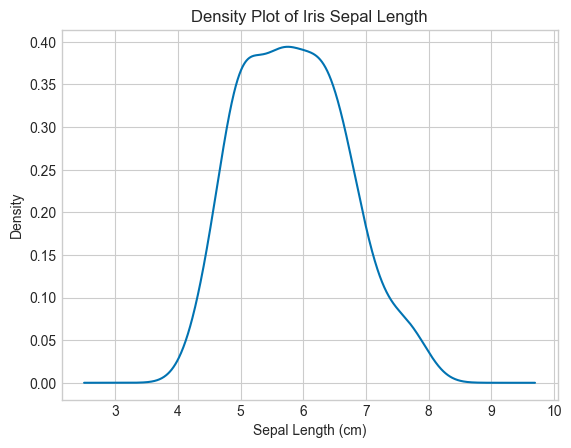

In [ ]:
# TODO: Create a density plot (KDE) of sepal_length from the iris dataset
iris['sepal_length'].plot.kde()
plt.xlabel('Sepal Length (cm)')
plt.title('Density Plot of Iris Sepal Length')
plt.show()

# For seaborn kdeplot, it would be:
# sns.kdeplot(data=iris, x='sepal_length', fill=True)

<Axes: xlabel='sepal_length', ylabel='Density'>

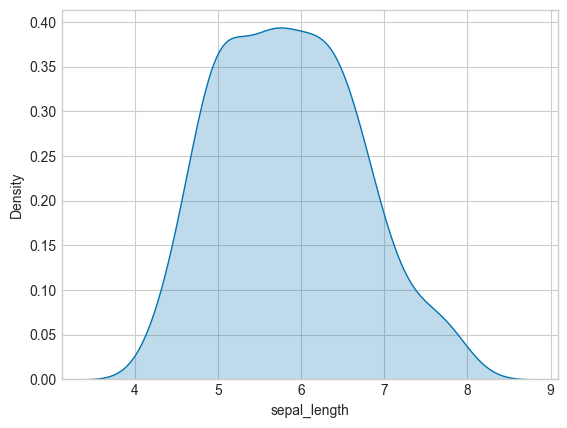

In [93]:
sns.kdeplot(data=iris, x='sepal_length', fill=True)

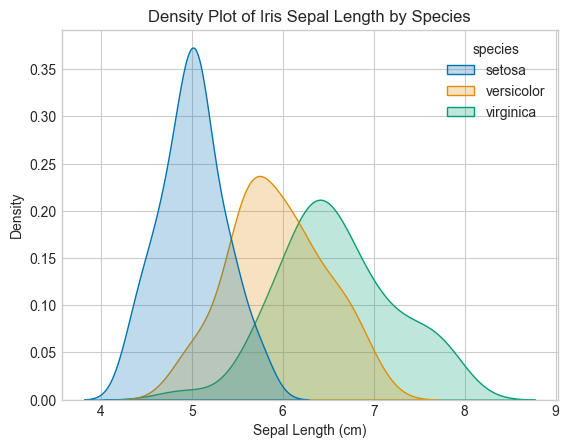

In [94]:
# TODO: Create overlapping density plots of sepal_length for each iris species
# Hint: Use seaborn's kdeplot with hue parameter
sns.kdeplot(data=iris, x='sepal_length', hue='species', fill=True)
plt.xlabel('Sepal Length (cm)')
plt.title('Density Plot of Iris Sepal Length by Species')
plt.show()

## Conceptual Question 6

**Looking at the boxplot you created for body_mass_g by species:**
1. Which species has the highest median body mass?
2. Which species has the most variability in body mass?
3. Are there any outliers visible?

*Your answer here:*
1. Gentooo
2. Gentoo
3. Chinstrap has two outliers, one above and one below the whiskers.

## Exercise 5.4: Frequency Tables

In [95]:
# TODO: Create a frequency table of penguin species
# Hint: Use .value_counts()
penguins['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [96]:
# TODO: Create bins for body_mass_g and show the frequency table
# Use pd.cut() to create 5 equal-width bins
penguins['body_mass_bin'] = pd.cut(penguins['body_mass_g'], bins=5)
penguins['body_mass_bin'].value_counts().sort_index()

body_mass_bin
(2696.4, 3420.0]     56
(3420.0, 4140.0]    121
(4140.0, 4860.0]     80
(4860.0, 5580.0]     54
(5580.0, 6300.0]     22
Name: count, dtype: int64

---

# PART 6: Binary and Categorical Data

---

## Exercise 6.1: Mode

In [97]:
# TODO: Find the mode of the 'condition' column in gene_expression
gene_expression['condition'].mode()

0    treatment_B
Name: condition, dtype: object

In [98]:
# TODO: Find the mode of 'tumor_stage' in gene_expression
gene_expression['tumor_stage'].mode()

0    I
Name: tumor_stage, dtype: category
Categories (4, object): ['I' < 'II' < 'III' < 'IV']

## Exercise 6.2: Proportions

In [99]:
# TODO: Calculate the proportion of each tumor stage in the dataset
# Hint: Use value_counts(normalize=True)
gene_expression['tumor_stage'].value_counts(normalize=True)

tumor_stage
I      0.450
II     0.325
III    0.160
IV     0.065
Name: proportion, dtype: float64

## Exercise 6.3: Bar Charts

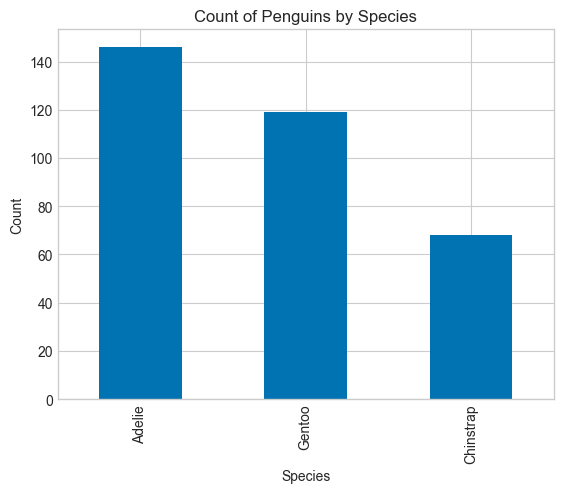

In [ ]:
# TODO: Create a bar chart showing the count of penguins by species
penguins['species'].value_counts().plot.bar()
plt.ylabel('Count')
plt.xlabel('Species')
plt.title('Count of Penguins by Species')
plt.show()

# with seaborn, it would be:
# sns.countplot(x='species', data=penguins)

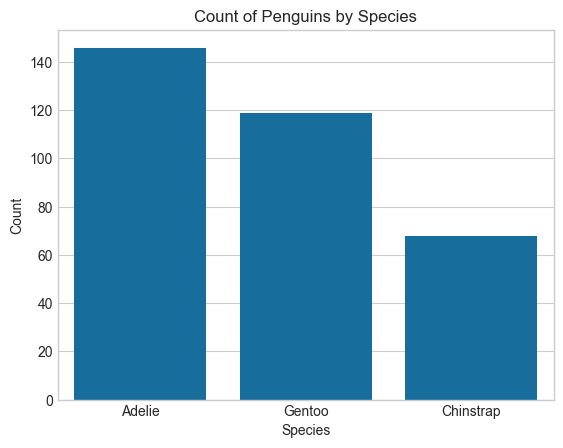

In [103]:
sns.countplot(x='species', data=penguins, order=penguins['species'].value_counts().index)
plt.ylabel('Count')
plt.xlabel('Species')
plt.title('Count of Penguins by Species')
plt.show()

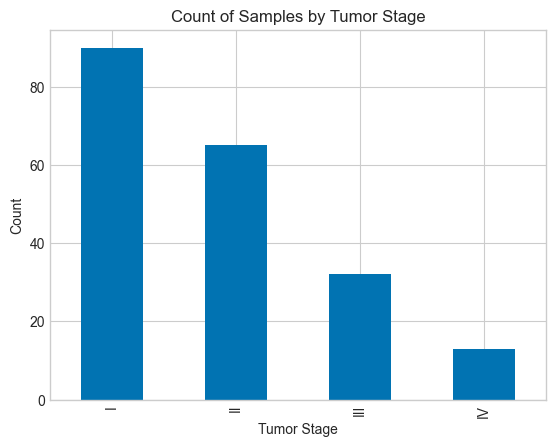

In [104]:
# TODO: Create a bar chart showing the count of samples by tumor_stage
# Make sure the stages are in order (I, II, III, IV)
gene_expression['tumor_stage'].value_counts().sort_index().plot.bar()
plt.ylabel('Count')
plt.xlabel('Tumor Stage')
plt.title('Count of Samples by Tumor Stage')
plt.show()

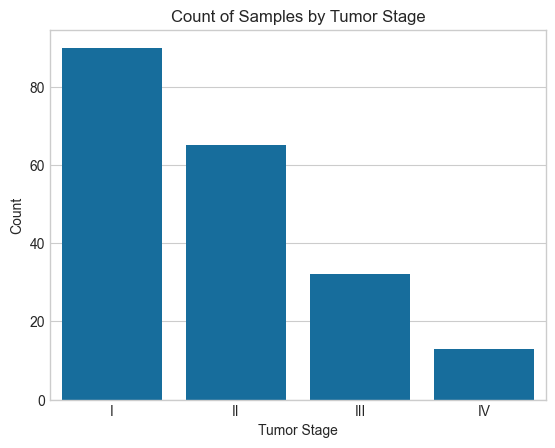

In [105]:
sns.countplot(x='tumor_stage', data=gene_expression, order=['I', 'II', 'III', 'IV'])
plt.ylabel('Count')
plt.xlabel('Tumor Stage')
plt.title('Count of Samples by Tumor Stage')
plt.show()

## Exercise 6.4: Expected Value

A drug company is testing a new cancer treatment. Based on clinical trial data:
- 60% of patients show no response (benefit = $0)
- 25% show partial response (benefit = $10,000 in saved treatment costs)
- 15% show complete response (benefit = $50,000 in saved treatment costs)

In [108]:
# TODO: Calculate the expected value (expected benefit) per patient
print(f"The expected benefit per patient is { (0.6 * 0) + (0.25 * 10000) + (0.15 * 50000) } dollars.")

The expected benefit per patient is 10000.0 dollars.


---

# PART 7: Correlation

---

## Conceptual Question 7

**What does a correlation coefficient of 0.8 tell you? What about -0.3? What about 0?**

*Your answer here:*  
A correlation coefficient of 0.8 tells us that there is a strong positive correlation between two variables.  
A correlation coefficient of -0.3 tells us that there is a weak negative correlation.  
A correlation coefficient of zero tells us that there is no correlation.  



## Exercise 7.1: Correlation Coefficient

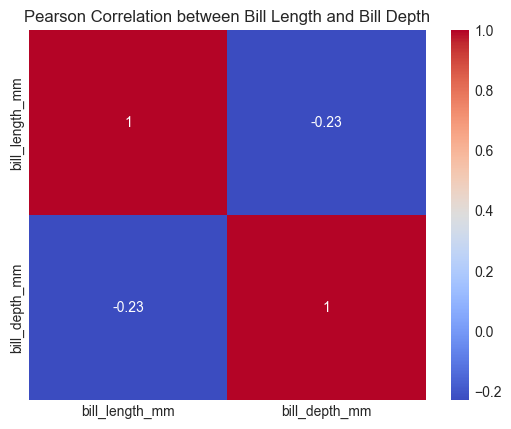

In [ ]:
# TODO: Calculate the Pearson correlation between bill_length_mm and bill_depth_mm in penguins
penguins[['bill_length_mm', 'bill_depth_mm']].corr(method='pearson')

# If I want it to look pretty:
corr = penguins[['bill_length_mm', 'bill_depth_mm']].corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation between Bill Length and Bill Depth')
plt.show()

# Low correlation at -0.2 indicates a weak negative linear relationship between bill length and bill depth in penguins.

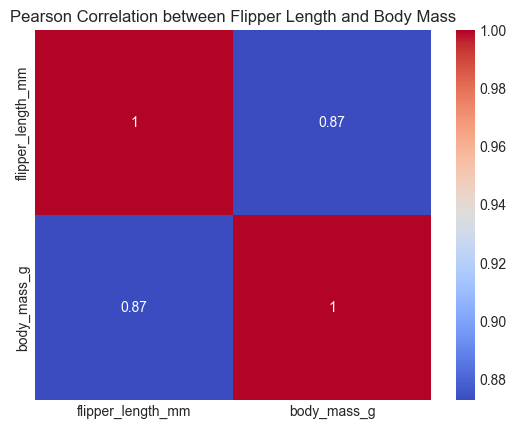

In [ ]:
# TODO: Calculate the correlation between flipper_length_mm and body_mass_g in penguins
corr = penguins[['flipper_length_mm', 'body_mass_g']].corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation between Flipper Length and Body Mass')
plt.show()

# High correlation at 0.87 indicates that as flipper length increases, body mass tends to increase as well,
# suggesting a strong positive linear relationship between these two variables in penguins.

## Exercise 7.2: Correlation Matrix

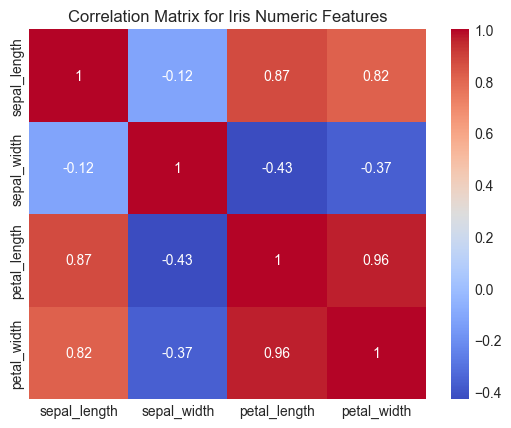

In [114]:
# TODO: Create a correlation matrix for all numeric columns in the iris dataset
iris.dtypes

# The numeric columns are sepal_length, sepal_width, petal_length, petal_width
# So we can create the correlation matrix for these columns
corr_matrix = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Iris Numeric Features')
plt.show()

## Exercise 7.3: Scatterplots

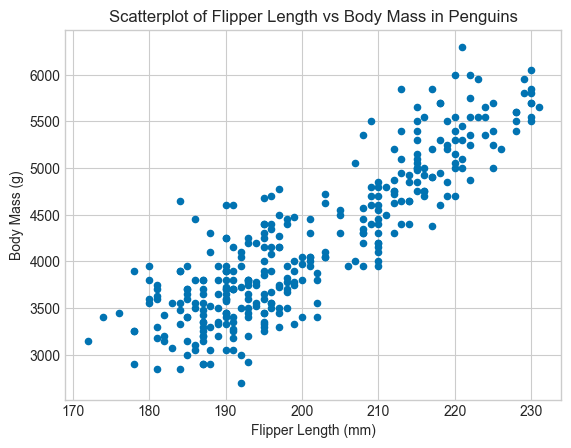

In [115]:
# TODO: Create a scatterplot of flipper_length_mm vs body_mass_g for penguins
penguins.plot.scatter(x='flipper_length_mm', y='body_mass_g')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Scatterplot of Flipper Length vs Body Mass in Penguins')
plt.show()

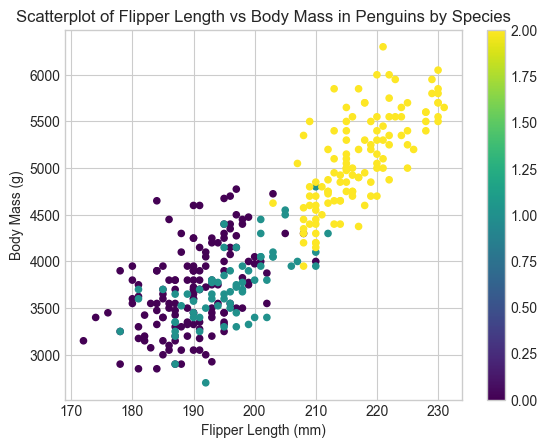

In [ ]:
# TODO: Create the same scatterplot but color-coded by species
penguins.plot.scatter(x='flipper_length_mm', y='body_mass_g', c=penguins['species'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Scatterplot of Flipper Length vs Body Mass in Penguins by Species')
plt.show()

# With seaborn, it would be:
# sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

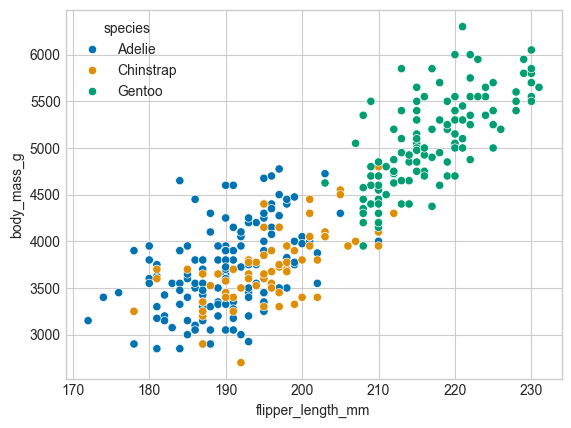

In [117]:
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')

## Conceptual Question 8

**When you color the scatterplot by species, does the correlation within each species look different from the overall correlation? Why might this matter?**

(This is related to Simpson's Paradox)

*Your answer here:*  
Yes, the correlation within each species may differ from the overall correlation due to the presence of confounding variables. When we look at the overall correlation, we are aggregating data from all species, which can mask the individual relationships within each species. This matters because it can lead to misleading conclusions if we only consider the overall correlation without accounting for the differences between species. Understanding the correlations within each species can provide more accurate insights into the relationships between variables.

---

# PART 8: Exploring Two or More Variables

---

## Exercise 8.1: Contingency Tables

In [118]:
# TODO: Create a contingency table of penguin species vs island
# Hint: Use pd.crosstab()
penguins_ct = pd.crosstab(penguins['species'], penguins['island'])
penguins_ct

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,55,47
Chinstrap,0,68,0
Gentoo,119,0,0


In [119]:
# TODO: Create a contingency table of condition vs tumor_stage in gene_expression
gene_expression_ct = pd.crosstab(gene_expression['condition'], gene_expression['tumor_stage'])
gene_expression_ct

tumor_stage,I,II,III,IV
condition,,,,
control,33,18,9,6
treatment_A,31,17,11,2
treatment_B,26,30,12,5


## Exercise 8.2: Hexagonal Binning

When you have many data points, hexbin plots are better than scatterplots.

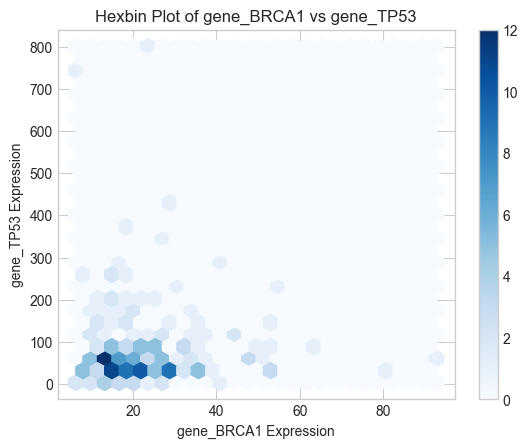

In [120]:
# TODO: Create a hexbin plot of gene_BRCA1 vs gene_TP53
# Hint: Use plt.hexbin() or the pandas hexbin method
gene_expression.plot.hexbin(x='gene_BRCA1', y='gene_TP53', gridsize=25, cmap='Blues')
plt.xlabel('gene_BRCA1 Expression')
plt.ylabel('gene_TP53 Expression')
plt.title('Hexbin Plot of gene_BRCA1 vs gene_TP53')
plt.show()

## Exercise 8.3: Violin Plots

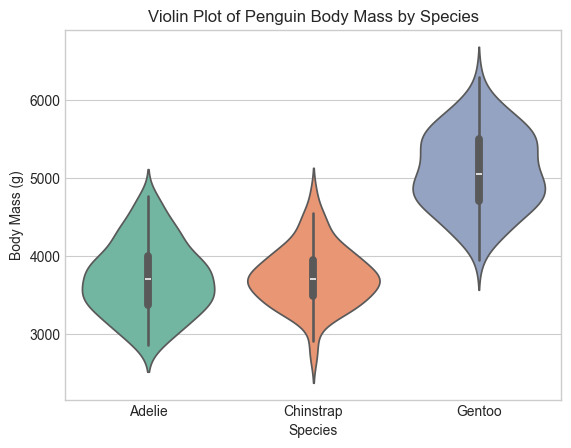

In [122]:
# TODO: Create a violin plot of body_mass_g by species for penguins
sns.violinplot(x='species', y='body_mass_g', data=penguins, palette='Set2')
plt.ylabel('Body Mass (g)')
plt.xlabel('Species')
plt.title('Violin Plot of Penguin Body Mass by Species')
plt.show()

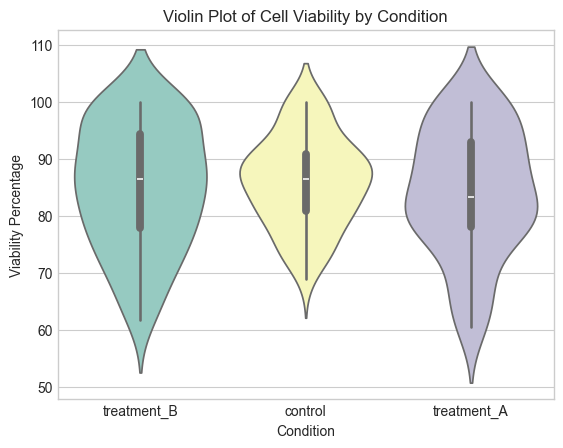

In [ ]:
# TODO: Create a violin plot of viability_pct by condition in gene_expression
sns.violinplot(x='condition', y='viability_pct', data=gene_expression, palette='Set3')
plt.ylabel('Viability Percentage')
plt.xlabel('Condition')
plt.title('Violin Plot of Cell Viability by Condition')
plt.show()

# you use ax when you want to customize the plot further, such as adding titles, labels, or modifying other aspects of the 
# plot after its creation.

## Exercise 8.4: Faceted Plots (Conditioning Variables)

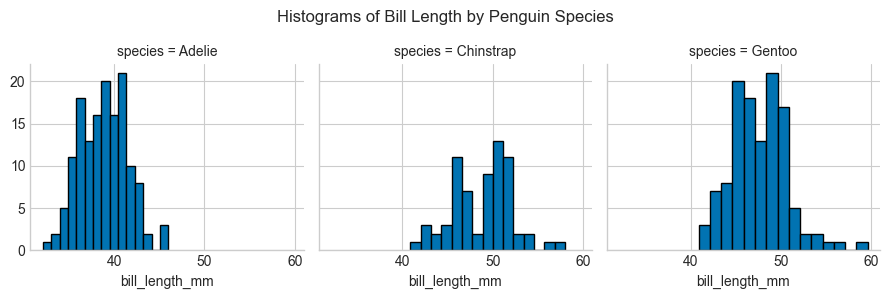

In [ ]:
# TODO: Create a FacetGrid showing histograms of bill_length_mm for each penguin species
# Hint: Use sns.FacetGrid() with col parameter
sns.FacetGrid(penguins, col='species').map(plt.hist, 'bill_length_mm', bins=15, edgecolor='black')
# col stands for column not color
plt.subplots_adjust(top=0.8) # this adjusts the subplot to make room for the suptitle
plt.suptitle('Histograms of Bill Length by Penguin Species')
plt.show()

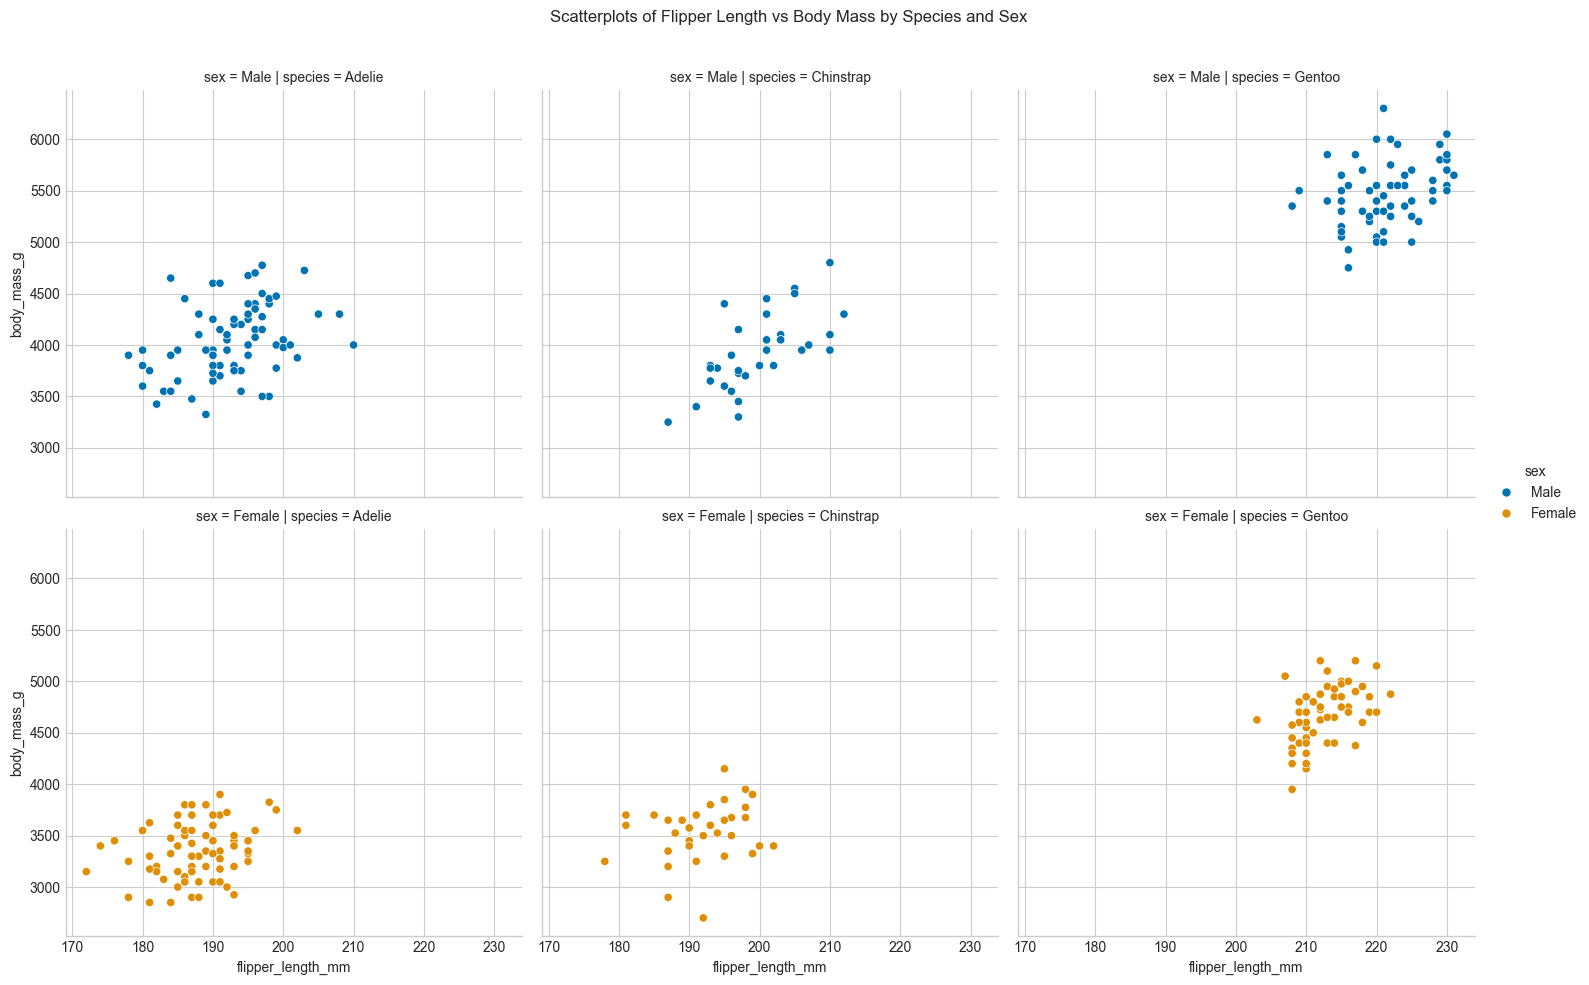

Text(0.5, 0.98, 'Scatterplots of Flipper Length vs Body Mass by Species and Sex')

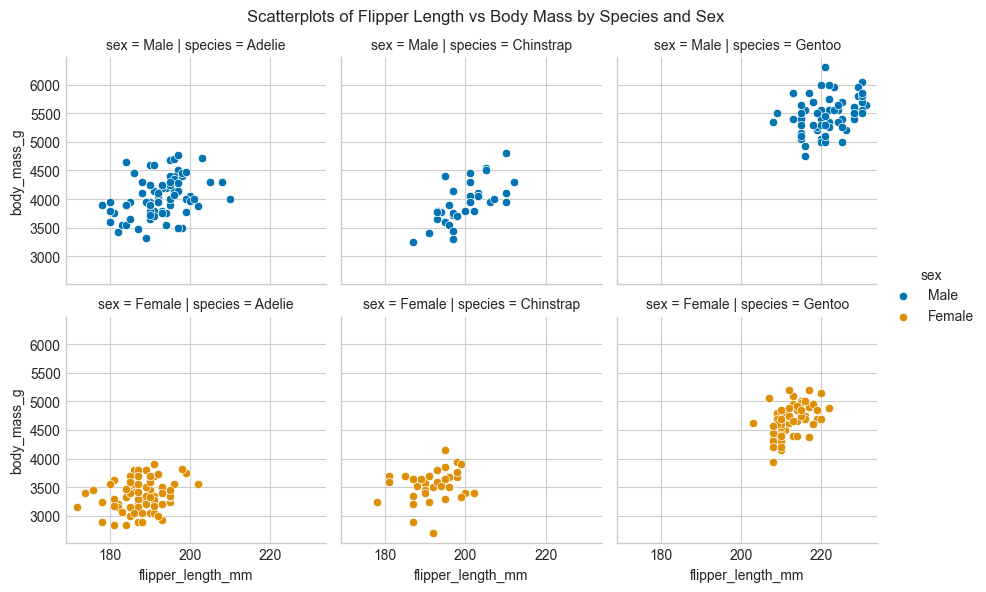

In [129]:
# TODO: Create scatterplots of flipper_length vs body_mass, faceted by both species and sex
# Hint: Use sns.FacetGrid with col and row parameters, or use sns.relplot()
sns.relplot(data=penguins, x='flipper_length_mm', y='body_mass_g', col='species', row='sex', hue='sex')
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplots of Flipper Length vs Body Mass by Species and Sex')
plt.show()

# the difference between sns.FacetGrid and sns.relplot is that FacetGrid is a lower-level interface that allows for more
# customization and control over the layout of the facets, while relplot is a higher-level interface that simplifies the creation of 
# relational plots with faceting.

# Try with FacetGrid:
g = sns.FacetGrid(penguins, col='species', row='sex', hue='sex')
g.map(sns.scatterplot, 'flipper_length_mm', 'body_mass_g')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatterplots of Flipper Length vs Body Mass by Species and Sex')

---

# PART 9: Putting It All Together - Mini EDA Project

---

## Challenge: Complete EDA on Gene Expression Data

Perform a complete exploratory data analysis on the `gene_expression` dataset. Your analysis should include:

1. **Basic summary statistics** for all numeric columns
2. **Distribution visualization** for at least 2 genes
3. **Comparison of expression levels** across conditions
4. **Correlation analysis** between genes
5. **At least one interesting finding** you discovered

Use the cells below to conduct your analysis.

In [130]:
# 1. Basic summary statistics
gene_expression.describe()

,gene_BRCA1,gene_TP53,gene_MYC,cell_count,viability_pct
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,23.003742,83.639509,36.165115,1000.830000,85.012087
std,12.700569,97.713404,68.882273,32.872085,10.063235
min,6.302623,3.378611,0.168327,919.000000,60.448750
25%,14.363064,32.295991,5.732779,977.000000,78.533081
50%,19.811199,57.354333,14.660301,999.500000,86.034788
75%,27.241559,91.794211,32.850340,1023.250000,92.605062
max,92.809370,800.000000,549.676852,1094.000000,100.000000


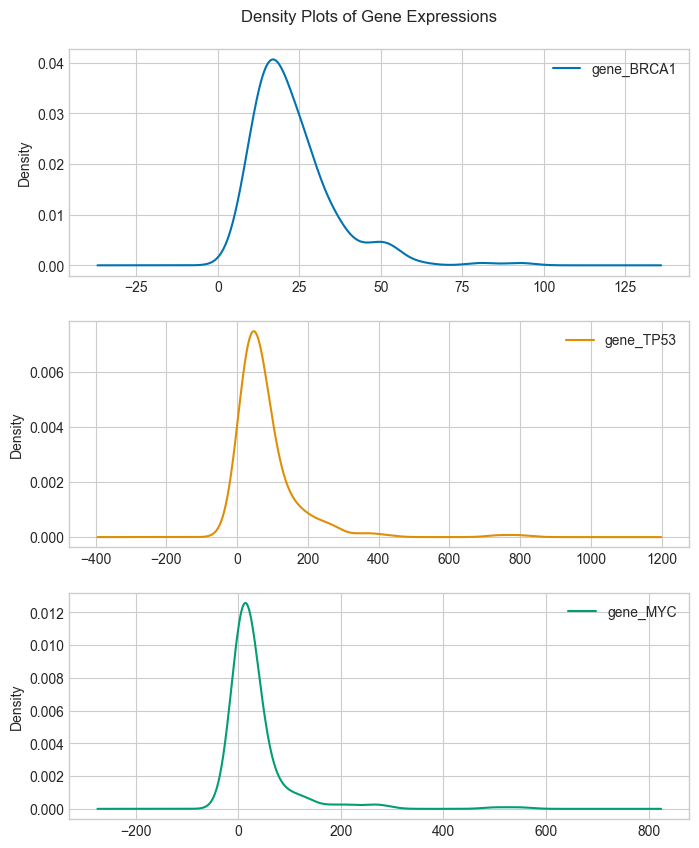

In [131]:
# 2. Distribution visualization for genes
gene_expression[['gene_BRCA1', 'gene_TP53', 'gene_MYC']].plot.kde(subplots=True, layout=(3,1), sharex=False, figsize=(8,10))
plt.suptitle('Density Plots of Gene Expressions', y=0.92)
plt.show()

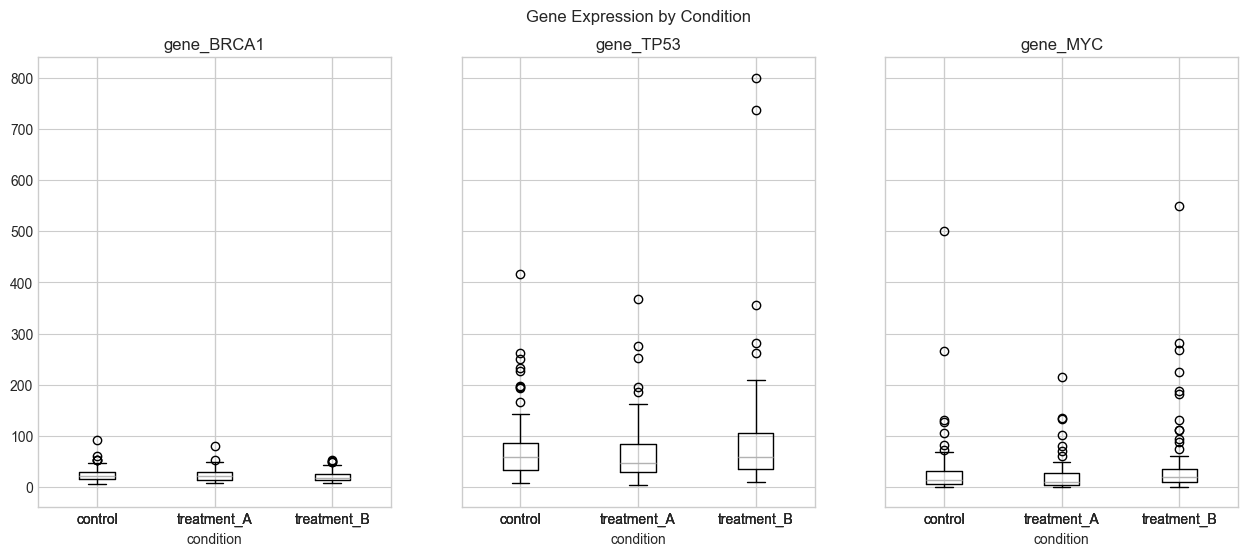

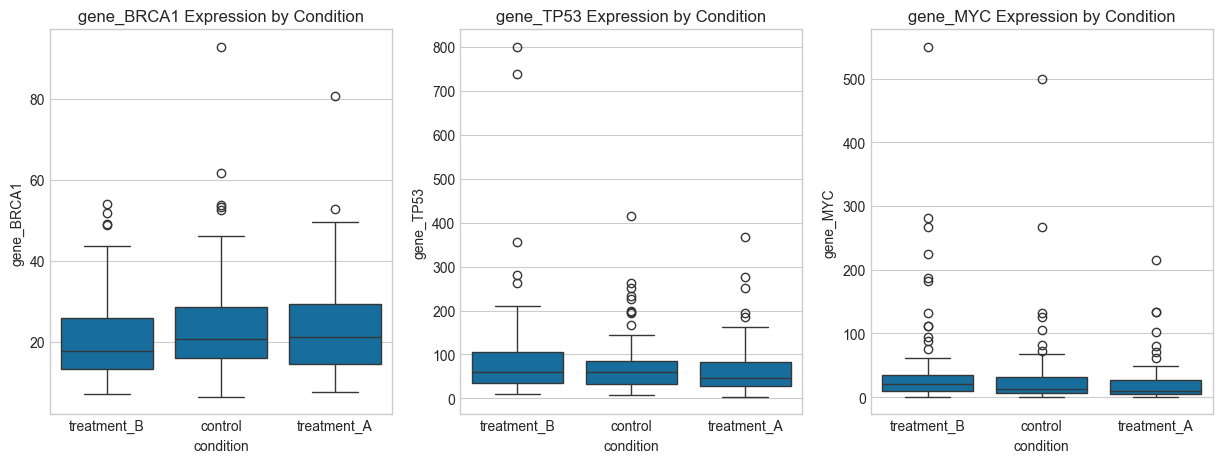

In [ ]:
# 3. Compare expression levels across conditions
gene_expression.boxplot(column=['gene_BRCA1', 'gene_TP53', 'gene_MYC'], by='condition', figsize=(15,6), layout=(1,3))
plt.suptitle('Gene Expression by Condition')
plt.show()

#or with sns for each gene as separatesubplots within one main plot:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='condition', y='gene_BRCA1', data=gene_expression, ax=axs[0])
axs[0].set_title('gene_BRCA1 Expression by Condition')

sns.boxplot(x='condition', y='gene_TP53', data=gene_expression, ax=axs[1])
axs[1].set_title('gene_TP53 Expression by Condition')

sns.boxplot(x='condition', y='gene_MYC', data=gene_expression, ax=axs[2])
axs[2].set_title('gene_MYC Expression by Condition')
plt.show()

# We use figures and axes (fig, axs) when we want to create multiple subplots within a single figure, allowing for more complex 
# layouts and customized arrangements of plots.

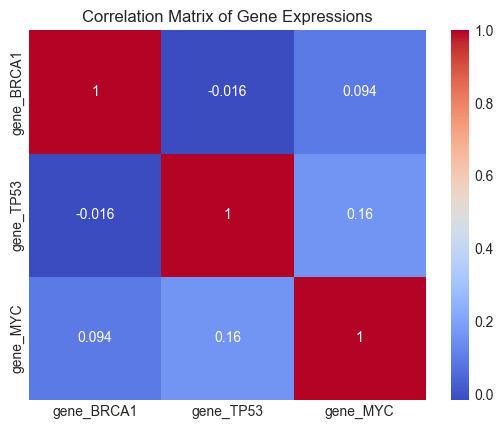

In [145]:
# 4. Correlation analysis between genes
gene_corr = gene_expression[['gene_BRCA1', 'gene_TP53', 'gene_MYC']].corr()
sns.heatmap(gene_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Gene Expressions')
plt.show()

---

# BONUS: Additional Practice

---

## Bonus 1: Outlier Detection

Using the IQR method, identify outliers in `gene_MYC`.

Outliers are typically defined as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.

In [147]:
# TODO: Calculate Q1, Q3, and IQR for gene_MYC
gene_MYC_Q1 = gene_expression['gene_MYC'].quantile(0.25)
gene_MYC_Q3 = gene_expression['gene_MYC'].quantile(0.75)
gene_MYC_IQR = gene_MYC_Q3 - gene_MYC_Q1
print(f"Q1: {gene_MYC_Q1}, Q3: {gene_MYC_Q3}, IQR: {gene_MYC_IQR}")

Q1: 5.732779124004557, Q3: 32.85033984356405, IQR: 27.117560719559492


In [148]:
# TODO: Define the lower and upper bounds for outliers
gene_MYC_lower_bound = gene_MYC_Q1 - 1.5 * gene_MYC_IQR
gene_MYC_upper_bound = gene_MYC_Q3 + 1.5 * gene_MYC_IQR
print(f"Lower Bound: {gene_MYC_lower_bound}, Upper Bound: {gene_MYC_upper_bound}")

Lower Bound: -34.94356195533468, Upper Bound: 73.5266809229033


In [151]:
# TODO: Find and display the outliers in gene_MYC
gene_MYC_outliers = gene_expression[(gene_expression['gene_MYC'] < gene_MYC_lower_bound) | (gene_expression['gene_MYC'] > gene_MYC_upper_bound)]
print(f"Number of outliers found: {gene_MYC_outliers.shape[0]}")
print(gene_MYC_outliers[['sample_id', 'gene_MYC']])

Number of outliers found: 23
    sample_id    gene_MYC
5        S006  500.000000
8        S009  267.197996
11       S012   87.912220
13       S014  132.074174
26       S027  105.024900
31       S032  281.473959
36       S037  111.762535
46       S047  133.808515
47       S048  131.734766
50       S051  214.402251
70       S071   94.741392
72       S073  102.192019
77       S078   74.661448
91       S092   81.421304
97       S098  110.955773
102      S103  182.844842
104      S105  549.676852
109      S110  134.179794
111      S112   79.926967
156      S157  187.163385
174      S175  224.936305
175      S176  126.428776
190      S191  266.572655


## Bonus 2: Log Transformation

Gene expression data is often log-transformed. Create histograms of `gene_MYC` before and after log transformation.

In [156]:
gene_expression['gene_MYC_log'] = np.log1p(gene_expression['gene_MYC'])
print(gene_expression[['gene_MYC', 'gene_MYC_log']].head(n=10))

     gene_MYC  gene_MYC_log
0   16.641603      2.870260
1    2.587667      1.277502
2    1.872722      1.055260
3   15.611805      2.810114
4    8.006546      2.197952
5  500.000000      6.216606
6   61.051550      4.127965
7    2.536567      1.263156
8  267.197996      5.591725
9    5.761397      1.911229


In [162]:
gene_expression

# TO reorder gene_MYC_log to come after gene_MYC
gene_expression = gene_expression[['sample_id', 'condition', 'gene_BRCA1', 'gene_TP53', 'gene_MYC', 'gene_MYC_log', 'cell_count', 'viability_pct', 'tumor_stage']]

gene_expression

,sample_id,condition,gene_BRCA1,gene_TP53,gene_MYC,gene_MYC_log,cell_count,viability_pct,tumor_stage
0,S001,treatment_B,14.420212,198.077080,16.641603,2.870260,1067,89.822719,II
1,S002,control,18.667118,83.293319,2.587667,1.277502,991,80.801003,I
2,S003,treatment_B,13.157494,40.682164,1.872722,1.055260,948,96.312528,II
3,S004,treatment_B,13.313191,35.227295,15.611805,2.810114,1023,82.252525,I
4,S005,control,34.583044,125.831098,8.006546,2.197952,957,98.844421,I
...,...,...,...,...,...,...,...,...,...
195,S196,treatment_A,15.596710,91.913879,39.407320,3.699011,964,66.078158,II
196,S197,treatment_B,20.601667,21.417005,34.273008,3.563118,1014,79.525096,IV
197,S198,treatment_B,25.720799,14.479397,25.740853,3.286192,1004,75.622202,III
198,S199,treatment_A,46.486073,69.057039,12.374038,2.593315,946,77.996512,I


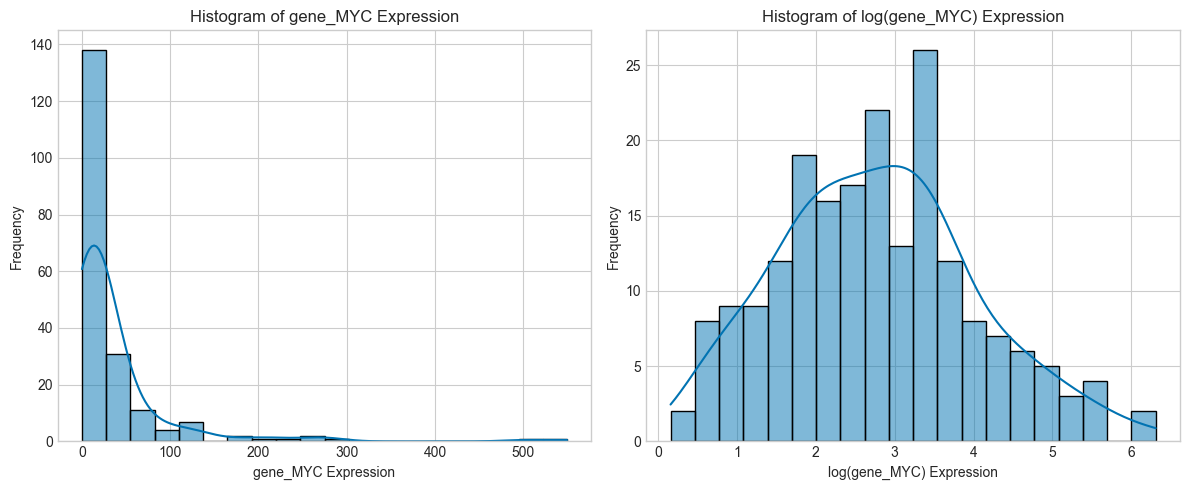

In [163]:
# TODO: Create side-by-side plots showing gene_MYC and log(gene_MYC)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(gene_expression['gene_MYC'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('Histogram of gene_MYC Expression')
axs[0].set_xlabel('gene_MYC Expression')
axs[0].set_ylabel('Frequency') 

sns.histplot(gene_expression['gene_MYC_log'], bins=20, kde=True, ax=axs[1])
axs[1].set_title('Histogram of log(gene_MYC) Expression')
axs[1].set_xlabel('log(gene_MYC) Expression')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Bonus 3: Coefficient of Variation

The coefficient of variation (CV) = std / mean is useful for comparing variability across features with different scales.

In [ ]:
# TODO: Calculate the CV for each gene (BRCA1, TP53, MYC)
# Which gene has the most relative variability?
gene_BRCA1_cv = gene_expression['gene_BRCA1'].std() / gene_expression['gene_BRCA1'].mean()
gene_TP53_cv = gene_expression['gene_TP53'].std() / gene_expression['gene_TP53'].mean()
gene_MYC_cv = gene_expression['gene_MYC'].std() / gene_expression['gene_MYC'].mean()   

print(f"CV of gene_BRCA1: {gene_BRCA1_cv}")
print(f"CV of gene_TP53: {gene_TP53_cv}")
print(f"CV of gene_MYC: {gene_MYC_cv}")

# The coefficient of variation (CV) is a standardized measure of dispersion of a probability distribution or frequency distribution.
# It is useful for comparing the degree of variation from one data series to another, even if the means are drastically different.
# In this case, the gene with the highest CV has the most relative variability in expression levels.

CV of gene_BRCA1: 0.552108837125839
CV of gene_TP53: 1.1682685043738503
CV of gene_MYC: 1.904660687680199


**Nice work! You've completed Chapter 1 practice.** 🎉